# Parity of a number

## we start out by defining two functions

In [2]:
def isEven(n):
    return n&1## for calculating the parity using a binary and operation with 1
# this program works on the basic observation that odd numbers 
#have the final bit 1 in their binary representation while even numbers have 0
def isEven2(n):
    return n%2
#this is the intuitive modules calculation for parity

In [14]:
!pip install matplotlib

import matplotlib.pyplot as plt

to compare the two programs in terms of time that they take to execute, we make them calculate the parity of increasingly larger numbers and calculate the execution time

In [26]:
import time
n = 2**18
step=2**13

times_bin_mod=[]
times_bin_and=[]
for i in range (0,n,step):

    ####### the binary and parity check function 
    start = time.process_time() ### the time when the function is started

    for j in range (i):

        isEven (j)
    time_elapsed_and=time.process_time() - start###calculate the time elapsed for the function execution
    times_bin_and.append(time_elapsed_and)## store the times for an increasing range of integers
    
    
    ######## the binary mod parity check function
    start = time.process_time()
    for j in range (i):

        isEven2 (j)
    time_elapsed_mod=time.process_time() - start
    times_bin_mod.append(time_elapsed_mod)
    
different_is=[i for i in range(0, n, step)]


it is necissary to plot the results of the calculations to compare the two functions based on execution time

In [40]:
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
###smoothing out the functions just to make the differences more visible
xnew = np.linspace(0,n, 10000)  

spl = make_interp_spline(different_is, times_bin_and, k=2)  # type: BSpline
power_smooth = spl(xnew)


spl2 = make_interp_spline(different_is, times_bin_mod, k=2)  # type: BSpline
power_smooth = spl(xnew)
power_smooth2 = spl2(xnew)


In [51]:

# Import libraries 
import matplotlib.patches as mpatches 
import matplotlib.pyplot as plt 

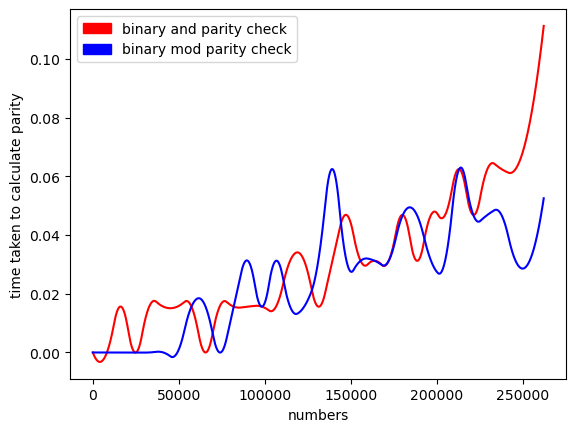

In [56]:
first=plt.plot(xnew, power_smooth, color='red')
second =plt.plot(xnew, power_smooth2, color='blue')
plt.xlabel("numbers")
plt.ylabel("time taken to calculate parity")
blue_patch = mpatches.Patch(color='blue', label='binary mod parity check') 
red_patch = mpatches.Patch(color='red', label='binary and parity check') 
plt.legend(handles=[red_patch,blue_patch]) 


## Analysis of the results
The expected answer for me was that the first code will run faster because of familiarity with languages such as c++ where a binary operations runs much more efficiantly than an operation like +/-*, 
which is because a binary operation with the number 1 requires no additional moves or registers by the compiler and the expected assembly code running in the background was something like:
for the first code:



_isEven:

    and r0, r0, #1
    bx  lr
    
and for the second:

_isEven2:

    mov r3, r0, lsr #31
    add r0, r0, r3
    and r0, r0, #1
    rsb r0, r3, r0
    bx  lr
so obviously the first should be more efficiant. 
However the actual results turned out to be different.
Both of the functions are running out in similar time, and the second one is actually outperforming the first in many cases.
And after a bit of research I found out the following results that will be explained bellow.

# Understanding the actual assembly code run by the python compiler

In [57]:
import dis

In [6]:
dis.dis(isEven) #assembly code for the binary and parity check

  2           0 LOAD_FAST                0 (n)
              2 LOAD_CONST               1 (1)
              4 BINARY_AND
              6 RETURN_VALUE


In [58]:
dis.dis(isEven2) #assembly code for the binary mod parity check

  4           0 LOAD_FAST                0 (n)
              2 LOAD_CONST               1 (2)
              4 BINARY_MODULO
              6 RETURN_VALUE


For starters both the operations seem to be running the same number of instructions.
There are 2 options for why this is the case, the first one is that the difference between the underlying code is at a deeper level than what the dis library can show. 
The second explanation is that there are optimizations done by the python compiler for such simple operations.
After a bit of research I found that such optimizations exist and that they are there for small size integers of length<2**30
so to see an actual difference we must test a larger number

In [5]:
from random import randint
from timeit import repeat 

#this code is intended to display the results
##the time is being calculated using the timeit library that calculates the execusion time for bits of code
def run_algorithm(algorithm, number):
    code=f"from __main__ import {algorithm}"\
    if algorithm !="sorted" else "" ## this is the built in sorting algorithm in python
    stmt=f"{algorithm}({number})"
    timers= repeat(setup=code, stmt=stmt, repeat=3, number =10000)## we will be repeating the excution of each 
    ## algorithm 10000 times and calculating the mean time of those execusions to return an answer and then
    ## we repeat that 3 times and return the minimum of those 3 avarages to get an accurate representation of the time taken
    print(f"minimum execusion time of the algorithm {algorithm} is: {min (timers)} s")
if __name__=="__main__":
    size=2**100
    number =randint(0,size)

    run_algorithm(algorithm="isEven", number=number )
    run_algorithm(algorithm="isEven2", number=number )
    

minimum execusion time of the algorithm isEven is: 0.0035786000080406666 s
minimum execusion time of the algorithm isEven2 is: 0.004318500054068863 s


### So as expected, the first algorithm now performs significantly better when the input number is large enough